#  <font color='green' size=5> Assignment #3
</font> 

**Time Series Analysis** <br>
**ANLT 207** <br>
**November 28, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

##  <font color='blue' size=4> Number 1 </font>

In [133]:
import pandas as pd
import numpy as np
import warnings
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt

##  <font color='blue' size=4> 1.a </font>

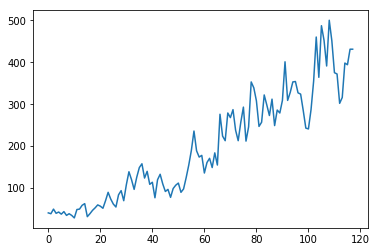

In [134]:
#Reading time series 
series = read_csv('robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

X=series.values
pyplot.plot(X)
pyplot.show()

##  <font color='blue' size=4> 1.b </font>

In [135]:
result = adfuller(X)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistics: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


The p-value shows this time series is not stationary.

##  <font color='blue' size=4> 1.c </font>

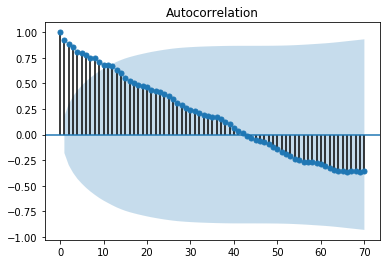

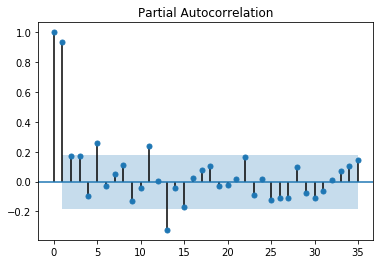

In [136]:
plot_acf(X , lags=70)
pyplot.show()

plot_pacf(X , lags=35)
pyplot.show()

##  <font color='blue' size=4> 1.d </font>

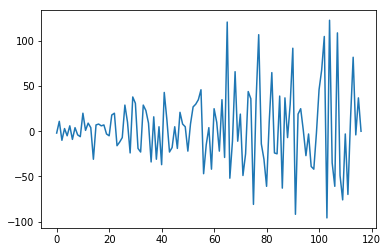

In [137]:
diff= list()

for i in range(1,len(X)):
    value=X[i]-X[i-1]
    diff.append(value) 
    
pyplot.plot(diff)
pyplot.show()

##  <font color='blue' size=4> 1.e </font>

In [138]:
result = adfuller(diff)

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))
    

ADF Statistics: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.494
	5%: -2.889
	10%: -2.582


The p-value proves that resulting time series is stationary.

##  <font color='blue' size=4> 1.f </font>

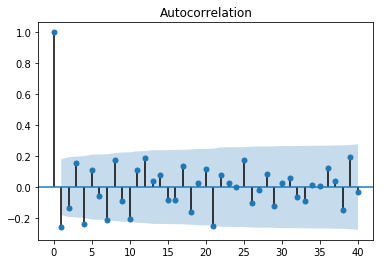

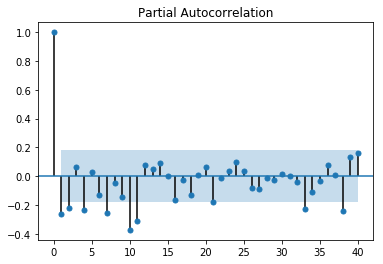

In [139]:
plot_acf(diff , lags=40)
pyplot.show()

plot_pacf(diff , lags=40)
pyplot.show()

Plots show that p=2 and q=1. Additionally, we had one level of differencing, so d=1.

##  <font color='blue' size=4> 1.g </font>

In [140]:
model=ARIMA(X, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  117
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -592.107
Method:                       css-mle   S.D. of innovations             38.118
Date:                Sat, 01 Dec 2018   AIC                           1194.213
Time:                        11:58:38   BIC                           1208.024
Sample:                             1   HQIC                          1199.820
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2979      2.539      1.299      0.197      -1.679       8.275
ar.L1.D.y     -0.8811      0.168     -5.235      0.000      -1.211      -0.551
ar.L2.D.y     -0.3641      0.086     -4.243      0.0

##  <font color='blue' size=4> 1.h </font>

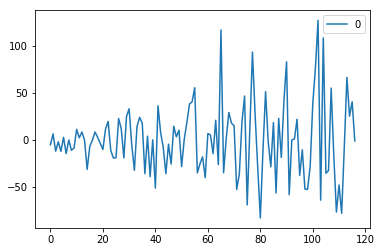

In [141]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

##  <font color='blue' size=4> 1.i </font>

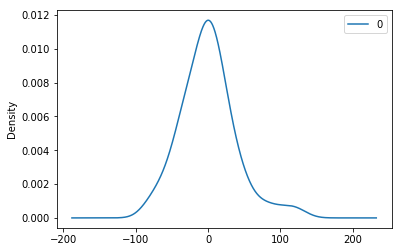

In [142]:
residuals.plot(kind='kde')
pyplot.show()

##  <font color='blue' size=4> 1.j </font>

In [143]:
print(residuals.describe())

                0
count  117.000000
mean     0.003001
std     38.282841
min    -83.077175
25%    -25.757164
50%     -0.239430
75%     18.435498
max    127.310558


##  <font color='blue' size=4> 1.k </font>

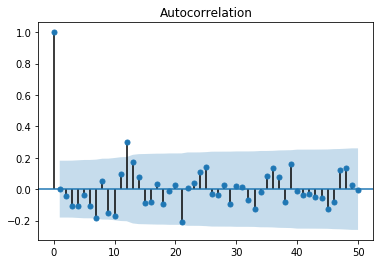

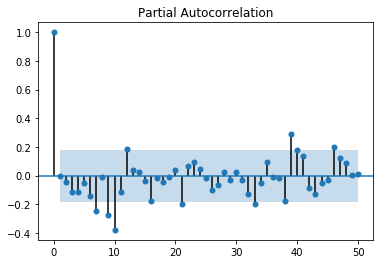

In [144]:
plot_acf(residuals, lags=50)
pyplot.show()

plot_pacf(residuals, lags=50)
pyplot.show()

##  <font color='blue' size=4> 1.l </font>

In [145]:
# i

resids = model_fit.resid
yhat = list()

for i in range(0 , len(resids)):
    value = diff[i] - resids[i]
    yhat.append(value)
    


Compare model (red) to original data (blue)


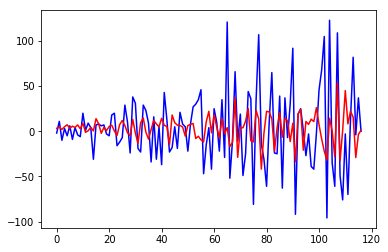

In [146]:
print('Compare model (red) to original data (blue)')
pyplot.plot(diff, color= 'blue')
pyplot.plot(yhat , color='red')
pyplot.show() 

In [148]:
# ii

added = list()
added.append(X[0])
for i in range(0, len(yhat)):
    value = X[i] + yhat[i]
    added.append(value)



Compare model (red) to original data (blue) [Approach in slides]


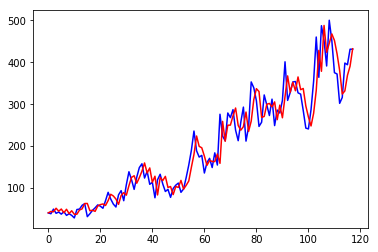

In [149]:
## iii

print('Compare model (red) to original data (blue) [Approach in slides]')
pyplot.plot(X, color= 'blue')
pyplot.plot(added , color='red')
pyplot.show() 

Above graph is based on approach that has been stated in slides of course. If we plan to do not use X in reconstruction of added, graph would be as following.

Compare model (red) to original data (blue) [My approach]


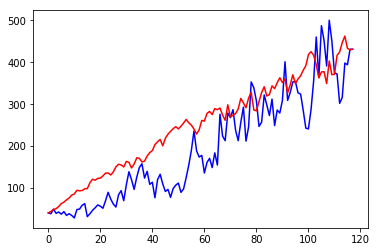

In [150]:
new_added = list()
new_added.append(X[0])
for i in range(0, len(yhat)):
    value = new_added[i] + yhat[i]
    new_added.append(value)
    
print('Compare model (red) to original data (blue) [My approach]')
pyplot.plot(X, color= 'blue')
pyplot.plot(new_added , color='red')
pyplot.show() 

Above graph shows that our model catch the trend very nice and it is main purpose of modeling.

##  <font color='blue' size=4> Number 2 </font>

In [125]:
p_values = range(0,7)
d_values = range(0,3)
q_values = range(0,7)
warnings.filterwarnings("ignore")
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                model=ARIMA(X, order)
                model_fit=model.fit(disp=0)
                AIC = ARIMAResults.aic(model_fit)
                if AIC < best_score:
                    best_score, best_cfg = AIC, order
                print('ARIMA%s AIC=%.3f' % (order,AIC))
            except:
                continue
print()
print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
print()

ARIMA(0, 0, 0) AIC=1483.025
ARIMA(0, 0, 1) AIC=1370.440
ARIMA(0, 0, 2) AIC=1333.202
ARIMA(0, 0, 3) AIC=1287.209
ARIMA(0, 1, 0) AIC=1205.224
ARIMA(0, 1, 1) AIC=1195.267
ARIMA(0, 1, 2) AIC=1189.947
ARIMA(0, 1, 3) AIC=1191.445
ARIMA(0, 1, 4) AIC=1183.620
ARIMA(0, 1, 5) AIC=1185.307
ARIMA(0, 1, 6) AIC=1186.504
ARIMA(0, 2, 0) AIC=1303.089
ARIMA(0, 2, 1) AIC=1202.619
ARIMA(1, 0, 0) AIC=1218.687
ARIMA(1, 0, 1) AIC=1211.669
ARIMA(1, 0, 2) AIC=1211.484
ARIMA(1, 0, 3) AIC=1221.309
ARIMA(1, 0, 5) AIC=1219.191
ARIMA(1, 1, 0) AIC=1199.151
ARIMA(1, 1, 1) AIC=1184.928
ARIMA(1, 2, 0) AIC=1263.837
ARIMA(2, 0, 0) AIC=1214.296
ARIMA(2, 1, 0) AIC=1195.470
ARIMA(2, 1, 1) AIC=1194.213
ARIMA(2, 2, 0) AIC=1228.646
ARIMA(2, 2, 1) AIC=1193.682
ARIMA(3, 0, 0) AIC=1211.780
ARIMA(3, 0, 1) AIC=1210.067
ARIMA(3, 1, 0) AIC=1197.020
ARIMA(3, 1, 1) AIC=1196.212
ARIMA(3, 2, 0) AIC=1228.152
ARIMA(3, 2, 1) AIC=1195.123
ARIMA(4, 0, 0) AIC=1212.907
ARIMA(4, 0, 1) AIC=1211.985
ARIMA(4, 1, 0) AIC=1192.454
ARIMA(4, 1, 1) AIC=1

Optimum values based on AIC grid search are: p=6 , d=1 , q=3

##  <font color='blue' size=4> Number 3 </font>

In [126]:
optimum_model=ARIMA(X, order=(6,1,3))
optimum_model_fit = optimum_model.fit(disp=0)

optimum_residuals = DataFrame(optimum_model_fit.resid)
print("Residuals summary for interpreted ARIMA(2,1,1):")
print(residuals.describe())
print("Residuals summary for optimum ARIMA(6,1,3):")
print(optimum_residuals.describe())

Residuals summary for interpreted ARIMA(2,1,1):
                0
count  117.000000
mean     0.003001
std     38.282841
min    -83.077175
25%    -25.757164
50%     -0.239430
75%     18.435498
max    127.310558
Residuals summary for optimum ARIMA(6,1,3):
                0
count  117.000000
mean    -1.033471
std     34.379643
min    -76.025203
25%    -21.853527
50%     -5.024438
75%     14.589505
max    109.871836


It shows imrovements in all statistics of optimum order.

Compare ARIMA(2,1,1) model (red) to original data (blue) [Approach in slides]


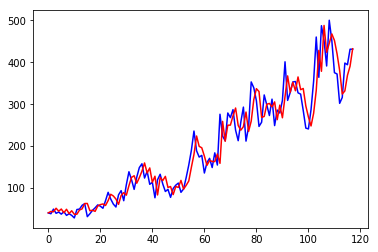

Compare ARIMA(6,1,3) model (red) to original data (blue) [Approach in slides]


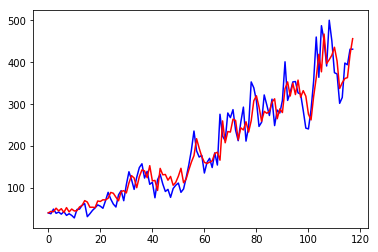

In [127]:
print('Compare ARIMA(2,1,1) model (red) to original data (blue) [Approach in slides]')
pyplot.plot(X, color= 'blue')
pyplot.plot(added , color='red')
pyplot.show() 

optimum_resids = optimum_model_fit.resid
optimum_yhat = list()

for i in range(0 , len(optimum_resids)):
    value = diff[i] - optimum_resids[i]
    optimum_yhat.append(value)

optimum_added = list()
optimum_added.append(X[0])
for i in range(0, len(optimum_yhat)):
    value = X[i] + optimum_yhat[i]
    optimum_added.append(value)
    
print('Compare ARIMA(6,1,3) model (red) to original data (blue) [Approach in slides]')
pyplot.plot(X, color= 'blue')
pyplot.plot(optimum_added , color='red')
pyplot.show()

Above graphs are based on slides. Following graphs are based on my approach.

Compare ARIMA(2,1,1) model (red) to original data (blue) [My approach]


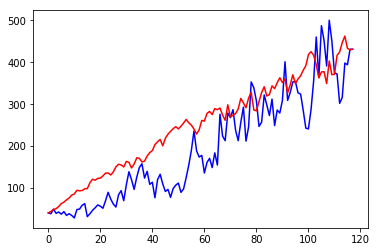

Compare ARIMA(6,1,3) model (red) to original data (blue) [My approach]


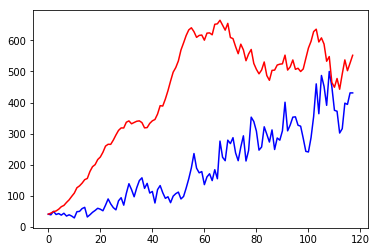

In [128]:
print('Compare ARIMA(2,1,1) model (red) to original data (blue) [My approach]')
pyplot.plot(X, color= 'blue')
pyplot.plot(new_added , color='red')
pyplot.show() 

optimum_resids = optimum_model_fit.resid
optimum_yhat = list()

for i in range(0 , len(optimum_resids)):
    value = diff[i] - optimum_resids[i]
    optimum_yhat.append(value)

optimum_new_added = list()
optimum_new_added.append(X[0])
for i in range(0, len(optimum_yhat)):
    value = optimum_new_added[i] + optimum_yhat[i]
    optimum_new_added.append(value)
    
print('Compare ARIMA(6,1,3) model (red) to original data (blue) [My approach]')
pyplot.plot(X, color= 'blue')
pyplot.plot(optimum_new_added , color='red')
pyplot.show()

Plots show that interpretation of ACF and PACF plots did better than grid search. 

##  <font color='blue' size=4> Number 4 </font>

##  <font color='blue' size=4> 4.a </font>

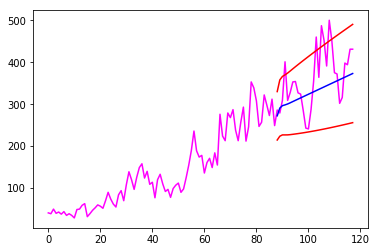


Full prediction interval:


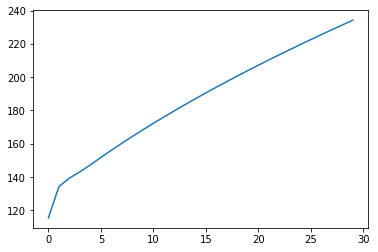

In [129]:
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

p=2
d=1
q=1

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(steps=len(test))[0]

limits = DataFrame(model_fit.forecast(steps=len(test))[2])
lowerlimit= limits[0]
upperlimit= limits[1]
predictionint= upperlimit - lowerlimit

pyplot.plot(X, color='magenta')
pyplot.plot([None for i in train]+[x for x in predictions] , color='blue')
pyplot.plot([None for i in train]+[x for x in upperlimit] , color='red')
pyplot.plot([None for i in train]+[x for x in lowerlimit] , color='red')
pyplot.show()
print()
print("Full prediction interval:")
pyplot.plot(predictionint)
pyplot.show()

##  <font color='blue' size=4> 4.b </font>

Test RMSE: 57.533


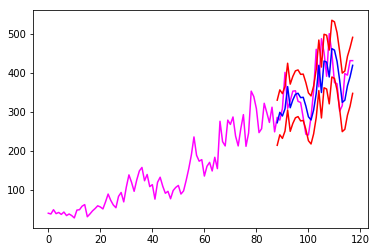


Full prediction interval:


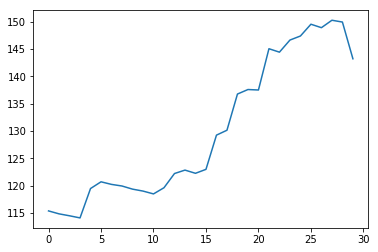

In [130]:
predictions = list()
lowerlimit = list()
upperlimit = list()
predictionint = list()

for t in range(len(test)):
    model= ARIMA(history , order=(p,d,q))
    model_fit = model.fit(disp=0)
    
    yhat = model_fit.forecast()[0]
    lolim= model_fit.forecast()[2][0][0]
    uplim= model_fit.forecast()[2][0][1]
    interval= uplim - lolim
    
    predictions.append(yhat)
    lowerlimit.append(lolim)
    upperlimit.append(uplim)
    predictionint.append(interval)
    
    obs=test[t]
    history.append(obs)
    
    #print('predicted=%f, expected=%f' % (yhat, obs))
    
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


pyplot.plot(X, color='magenta')
pyplot.plot([None for i in train]+[x for x in predictions] , color='blue')
pyplot.plot([None for i in train]+[x for x in upperlimit] , color='red')
pyplot.plot([None for i in train]+[x for x in lowerlimit] , color='red')
pyplot.show()
print()
print("Full prediction interval:")
pyplot.plot(predictionint)
pyplot.show()  